In [250]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.ndimage
import healpy as hp

In [251]:
input_alan=plt.imread("/Users/tom.kitching/Downloads/Alan.jpg")

In [252]:
alan_shape=np.shape(input_alan)
alan_shape
np.max(input_alan[:,:,0])

255

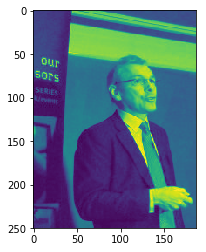

In [253]:
plt.figure()
plt.imshow(input_alan[:,:,0])
plt.show()

In [254]:
#set Nside etc.
Nside  = 32
L_hp = 4*Nside
Iterate = True
Npix   = hp.nside2npix(Nside)

In [255]:
count=0
theta=np.zeros(alan_shape[0]*alan_shape[1])
phi=np.zeros(alan_shape[0]*alan_shape[1])
original_alan=np.zeros(alan_shape[0]*alan_shape[1])
for i in np.arange(alan_shape[0]): 
    for j in np.arange(alan_shape[1]): 
        theta[count]=0.+np.pi*(i)/alan_shape[0]
        phi[count]=0+2.*np.pi*(j)/alan_shape[1]
        original_alan[count]=input_alan[i,j,1]
        count=count+1

In [256]:
pixnum = hp.ang2pix(Nside, theta, phi)

In [257]:
alan_hp     = np.zeros(Npix)
for i in range(count):
    pix = pixnum[i]
    alan_hp[pix] += original_alan[i]
            
alan_hp[alan_hp!=hp.UNSEEN] = alan_hp[alan_hp!=hp.UNSEEN]*(-1)

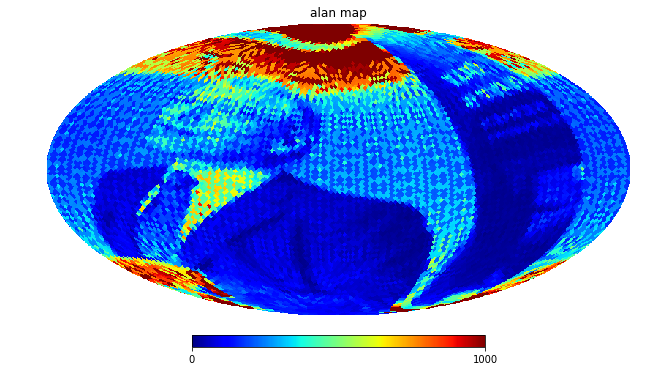

In [258]:
hp.mollview(np.abs(alan_hp), title="alan map", min=0, max=1000,rot=[150,10,0.0])
plt.show()

In [259]:
LMAX=2*Nside
cl = hp.anafast(alan_hp, lmax=LMAX)
ell = np.arange(len(cl))

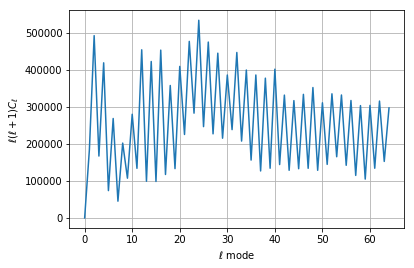

In [260]:
plt.figure()
plt.clf()
plt.plot(ell, ell * (ell+1) * cl)
plt.xlabel('$\ell$ mode'); plt.ylabel('$\ell(\ell+1)C_{\ell}$'); plt.grid()
plt.show()

In [263]:
random_alan=hp.synfast(cl, Nside, lmax=LMAX)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


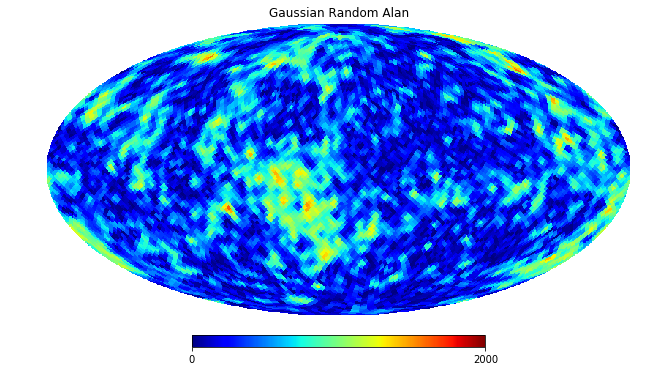

In [264]:
plt.clf()
hp.mollview(np.abs(random_alan), title="Gaussian Random Alan", min=0, max=2000,rot=[110,10,0.0])
plt.show()